# Problem Set 2 - Solutions

## Problem 1

(From Strang, section 2.2, problem 25.)
$$
A = \begin{pmatrix} a & 2 & 3 \\ a & a & 4 \\ a & a & a \end{pmatrix}?
$$
For which three numbers $a$ will elimination fail to give three pivots for this matrix?  That is, for which values of $a$ is this matrix *singular*?

#### Solution

First of all, if $a=0$ the matrix is already upper triangular and it has two pivots. So the matrix is singular for $a=0$. Now, supposet $a\neq 0$. Then we can subtract the first row from the second and the third, thus getting
$$
\begin{pmatrix} a & 2 & 3\\ 0 & a-2 & 1 \\ 0 & a-2 & a-3\end{pmatrix}
$$
As before, if $a=2$ the matrix is upper triangular with only two pivots and so is singular. Let us now assume $a\neq 2$. So we can subtract the second from the third and get
$$
\begin{pmatrix} a & 2 & 3\\ 0 & a-2 & 1 \\ 0 & 0 & a-4\end{pmatrix}
$$
This matrix is upper triangular and it is nonsingular if and only if $a$ is not $0$, $2$ or $4$. So those are the only values of $a$ for which the matrix is singular.

## Problem 2

Suppose we *already know* the inverse $A^{-1}$ of a $m \times m$ matrix $A$.   Now, we want to find the inverse $(A + uv^T)^{-1}$, where $u$ and $v$ are $m$-component column vectors.   Ideally, we'd like to do this without re-doing the whole matrix-inversion process!

### part (a)

Find the scalar (number) $\alpha$ so that
$$
(A + uv^T)^{-1} = A^{-1} - \frac{A^{-1} uv^T A^{-1}}{\alpha}
$$
(Hint: if you see an expression like $x^T B y$, realize that this is just a scalar and can be commuted with any other matrix/vector operations.)

#### Solution

Multiplying both sides by $A+uv^T$ on the left we get
$$
I = I -\frac{uv^TA^{-1}}{\alpha} + uv^TA^{-1} - \frac{uv^TA^{-1}uv^TA^{-1}}{\alpha}=I-\frac{uv^TA^{-1}}{\alpha}\left(\alpha - 1 - v^TA^{-1}u\right) 
$$
(remember that $v^TA^{-1}u$ is a number, and so it commutes with all matrices). So by choosing $\alpha=1+v^TA^{-1}u$ we have that the inverse of $A+uv^T$ is

$$
(A+uv^T)^{-1} = A^{-1}-\frac{A^{-1}uv^TA^{-1}}{1+v^TA^{-1}u}.
$$

This is actually a famous relationship, known as the [Sherman–Morrison formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula), that is extremely useful in lots of real problems.

### part (b)

Because matrix multiplication is [associative](https://en.wikipedia.org/wiki/Associative_property), we can compute $A^{-1} uv^T A^{-1}$ from above in different orders:

$$
A^{-1} (u(v^T A^{-1})) = A^{-1} ((uv^T) A^{-1}) = (A^{-1} u)(v^T A^{-1})
$$

If $m=5$ (i.e. $A$ is a $5 \times 5$ matrix and $u$ and $v$ are 5-component column vectors) compute *how many scalar multiplications* (multiplications of numbers) are required if we do the products indicated by the parentheses for these three different parenthesizations of $A^{-1} uv^T A^{-1}$, assuming you are given $A^{-1}$, $u$, and $v$ (and that all matrix entries are nonzero so you can't skip any multiplies).  (You *don't* need to actually do the matrix products, just work out how many multiplications they would require!)

Which order (parenthesization) would you choose to calculate $A^{-1} uv^T A^{-1}$ for your $(A + uv^T)^{-1}$ expression in part (a) in order to minimize your work?

For example, the outer product $uv^T$ produces an $m \times m$ matrix, whose $(i,j)$ entry is $u_i v_j$.  So, there is one multiplication per entry of the output, or $m^2$ multiplications (25) in total to compute $uv^T$.

#### Solution

To multiply a $k\times l$ matrix by a $l\times r$ matrix we need to do $l$ multiplications for each entry of the result. So we need to do $klr$ multiplications. Now let us do the three cases

* To compute $v^TA^{-1}$ we need to do $m^2$ multiplications and the result is an $m\times 1$ matrix. To compute $u(v^TA^{-1})$ we need to do $m^2$ additional multiplications and the result is an $m\times m$ matrix. Finally to compute $A^{-1}(u(v^TA^{-1}))$ we need to do $m^3$ multiplications. In total we did
$$ m^2+m^2+m^3=m^3+2m^2$$
multiplications

* To compute $uv^T$ we need to do $m^2$ multiplications. To compute $(uv^T)A^{-1}$ we need to do $m^3$ multiplications. Finally to compute $A^{-1}((uv^T)A^{-1}$ we need to do $m^3$ other multiplications. In total we need to do $2m^3+m^2$ multiplications

* To compute $A^{-1}u$ we need to do $m^2$ multiplications and the result is an $m\times 1$ matrix. To compute $v^TA^{-1}$ we need to do $m^2$ multiplications and the result is an $1\times m$ matrix. Finally to compute $(A^{-1}u)(v^TA^{-1})$ we need to do $m^2$ multiplications, so in total we did $3m^2$ multiplications.

The approach with the least amount of multiplications is by far the third one.


## Problem 3

(Similar to Strang 2.6 problem 22.)

In pset 1, you did "upside-down" Gaussian elimination to convert the matrix 
$$
A = \begin{pmatrix} 1 & 6 & -3 \\ -2 & 3 & 4 \\ 1 & 0 & -2 \end{pmatrix}
$$
into a *lower* triangular matrix
$$
L = \begin{pmatrix} -0.5 & 0 & 0 \\ 0 & 3 & 0 \\ 1 & 0 & -2 \end{pmatrix}
$$
Find an upper-triangular matrix $U$ such that $A=UL$.  (This example illustrates the fact that "upside-down" elimination corresponds to a "UL factorization" of $A$.)

#### Solution
To find the matrix $U$ we need to do in reverse order the operations we did to find $L$. So we need to start weith the identity
$$\begin{pmatrix} 1 & 0 & 0\\ 0& 1&0 \\ 0&0&1\end{pmatrix}$$
then add twice the second row to the first
$$\begin{pmatrix} 1 & 2 & 0\\ 0& 1&0 \\ 0&0&1\end{pmatrix}$$
and subtract twice the third row from the second and add $\frac{3}{2}$ times the third row to the first
$$U=\begin{pmatrix} 1 & 2 & 3/2\\ 0& 1&-2 \\ 0&0&1\end{pmatrix}$$

As we observed in class, the entries of $U$ above the diagonal are just the multipliers for the row reduction with the opposite sign.

## Problem 4

### part (a)

Show that by multiplying a lower-triangular $L$ matrix by a permutation (re-ordering) matrix $P$ on the left *and* right you can convert $L$ to an upper-triangular matrix $PLP$.  You don't have to prove it in general, just find the matrix $P$ that works for *any* $3 \times 3$ matrix $L$.

Once you have figured it out, check it. Enter your matrix $P$ in Julia below, and use it to flip the following lower-triangular matrix to an upper-triangular one:

In [1]:
X = [ 1  0  0
      2  3  0
      1  3 -1]

3x3 Array{Int64,2}:
 1  0   0
 2  3   0
 1  3  -1

In [2]:
P = [ 0 0 1
      0 1 0
      1 0 0]

3x3 Array{Int64,2}:
 0  0  1
 0  1  0
 1  0  0

In [3]:
P*X*P  # the result of this should be upper-triangular:

3x3 Array{Int64,2}:
 -1  3  1
  0  3  2
  0  0  1

#### Solution
Choose the matrix $P=\begin{pmatrix} 0 & 0 & 1\\ 0& 1 & 0\\ 1 & 0 & 0 \end{pmatrix}$. Then multiplying by $P$ on the left exchanges the first and third row, and multiplying by $P$ on the right exchanges the first and third columns, so doing both will convert a lower triangular matrix to an upper triangular matrix and vice versa.

Although you were not required to do anything but the $3 \times 3$ case, this is one of those cases where the general case is almost easier to understand.  If you have an arbitrary $m \times m$ lower triangular matrix, $P$ should just be the permutation that **reverses the order** of the rows or columns.  This is easy to see graphically:

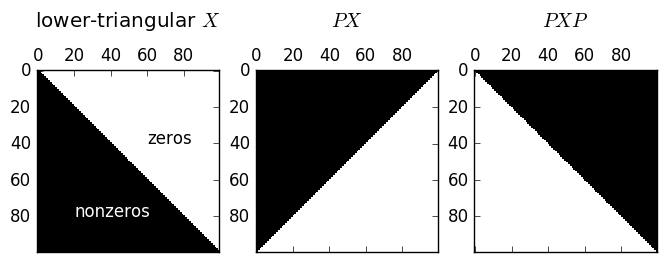

PyObject <matplotlib.text.Text object at 0x31b843190>

In [4]:
Xbig = Matrix(LowerTriangular(rand(100,100))) # a random 100×100 lower-triangular matrix
Pbig = eye(100,100)[100:-1:1,:] # the permutation matrix that reverses the rows (or cols)
using PyPlot
subplot(1,3,1)
spy(Xbig) # plot the nonzero pattern
title(L"lower-triangular $X$", y=1.2)
text(60,40, "zeros")
text(20,80, "nonzeros", color="white")
subplot(1,3,2)
spy(Pbig*Xbig)
title(L"PX", y=1.2)
subplot(1,3,3)
spy(Pbig*Xbig*Pbig)
title(L"PXP", y=1.2)

If $P$ is the reversal permutation, going from $X$ to $PX$ just reverses the rows, which flips the black triangle of nonzeros upside down but with the wrong orientation.  Reversing *both* rows and columns with $PXP$ gives the desired upper-triangular nonzero pattern.

### part (b)

What is $P^{-1}$?

You can find it numerically from Julia with the command `inv(P)`, but you should still explain *why* it comes out that way:

In [5]:
inv(P) # compute P⁻¹ numerically, using the P defined above

3x3 Array{Float64,2}:
 -0.0  -0.0  1.0
 -0.0   1.0  0.0
  1.0   0.0  0.0

#### Solution
We can see from above that `inv(P)` in Julia is in fact the same matrix as $P$ (up to roundoff errors).  

That is, $P^{-1} = P$.  The reason for this is that $P$ is the permutation that reverses the order of the rows, and reversing the order twice returns things back to the original order.  Hence $P^2=I$, that is $P^{-1}=P$.

It is also true that $P^{-1} = P^T$ for *any* permutation matrix, as explained in class, but this particular $P$ is even more special than that.

### part (c)

Suppose we take the $A$ matrix from problem 3 and the $P$ matrix from above, and compute the LU factorization $PAP = L' U'$ without row swaps (labeling the matrices $L'$ and $U'$ so that they aren't confused with the ones above), then compute $PL' P$ and $P U' P$.  How to the results compare to your $A=UL$ factorization from problem 3?

Why?  (You should be able to do some matrix algebra to turn $PAP = L' U'$ into $A = UL$.)

In [6]:
A = [ 1  6 -3
     -2  3  4
      1  0 -2 ]
L′, U′ = lu(P*A*P, Val{false}) # LU factorization of PAP without row swaps

(
3x3 Array{Float64,2}:
  1.0  0.0  0.0
 -2.0  1.0  0.0
  1.5  2.0  1.0,

3x3 Array{Float64,2}:
 -2.0  0.0   1.0
  0.0  3.0   0.0
  0.0  0.0  -0.5,

[1,2,3])

In [7]:
P*L′*P

3x3 Array{Float64,2}:
 1.0  2.0   1.5
 0.0  1.0  -2.0
 0.0  0.0   1.0

In [8]:
P*U′*P

3x3 Array{Float64,2}:
 -0.5  0.0   0.0
  0.0  3.0   0.0
  1.0  0.0  -2.0

#### Solution

Numerically, you should notice that `P*L′*P` is *exactly* the $U$ matrix from our $A=UL$ factorization in problem 3, and `P*U′*P` is exactly the $L$ matrix.  Now we want to *derive* this algebraically.

We want to transform the equation $PAP=L'U'$ into something of the form $A=\cdots$. So we multiply on the left and the right by $P^{-1}=P$ and we obtain

$$ A = PL'U'P$$

Now, we want to see the right hand side as the product of an upper triangular matrix by a lower triangular matrix. From part (a) we know that $PL'P$ and $PU'P$ are of the right form. Moreover, since $P^2=I$ we have that

$$ A = PL'U'P = PL'P^2U'P = (PL'P)(PU'P)$$

Finally, since $P$ just permutes rows and columns, the diagonal entries of $PL'P$ are all 1s, exactly as expected for an elimination matrix (as problem 3, above). So $(PL'P)(PU'P) = UL$ gives $U=PL'P$ and $L=PU'P$ from the $UL$ factorization of $A$.